In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [7]:
# This is to Load the dataset 
df = pd.read_csv(r"C:\Users\usmank\OneDrive - Access-ARM Pensions\Documents\Nexford Assignments\Business Analytics Capstone\Module 3 (Milestone 1 Assignment)\hospital_readmissions.csv")

In [9]:
# This is to display basic information
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   time_in_hospital                          25000 non-null  int64
 1   num_lab_procedures                        25000 non-null  int64
 2   num_procedures                            25000 non-null  int64
 3   num_medications                           25000 non-null  int64
 4   number_outpatient                         25000 non-null  int64
 5   number_emergency                          25000 non-null  int64
 6   number_inpatient                          25000 non-null  int64
 7   number_diagnoses                          25000 non-null  int64
 8   race_Caucasian                            25000 non-null  bool 
 9   race_AfricanAmerican                      25000 non-null  bool 
 10  gender_Female                             25

In [11]:
# This is to show the first five rows
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                14                  41               0               11   
1                 2                  30               0               12   
2                 5                  66               0               22   
3                 3                  63               0                8   
4                 5                  40               0                6   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  \
0                  0                 0                 0                 6   
1                  0                 0                 1                 9   
2                  1                 0                 2                 9   
3                  0                 0                 0                 8   
4                  0                 0                 1                 9   

   race_Caucasian  race_AfricanAmerican  ...

In [13]:
# This is to check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
time_in_hospital              0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
                             ..
metformin-rosiglitazone_No    0
metformin-pioglitazone_No     0
change_No                     0
diabetesMed_Yes               0
readmitted                    0
Length: 65, dtype: int64


In [17]:
# This is to remove duplicate rows from the dataset
df = df.drop_duplicates()

In [21]:
# This is to check for duplicates after removal
print(f"\nTotal duplicate rows after removal: {df.duplicated().sum()}")


Total duplicate rows after removal: 0


In [23]:
# This is to fill missing numerical values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

In [25]:
# This is to fill missing categorical values with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [27]:
# This is to verify missing values after handling
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
time_in_hospital              0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
                             ..
metformin-rosiglitazone_No    0
metformin-pioglitazone_No     0
change_No                     0
diabetesMed_Yes               0
readmitted                    0
Length: 65, dtype: int64


In [31]:
# This is to create a new feature: "Total Visits" (sum of outpatient, emergency, inpatient visits)
df["total_visits"] = df["number_outpatient"] + df["number_emergency"] + df["number_inpatient"]

In [33]:
# This is to convert Age Groups into a Single Numeric Column
age_mapping = {
    "age_[40-50)": 45, "age_[50-60)": 55, "age_[60-70)": 65,
    "age_[70-80)": 75, "age_[80-90)": 85
}

In [35]:
# This is to convert age groups to numerical values
for col, age_value in age_mapping.items():
    if col in df.columns:
        df.loc[df[col] == True, "age"] = age_value

In [37]:
# This is to drop original one-hot encoded age columns (only if they exist)
df.drop(columns=[col for col in age_mapping.keys() if col in df.columns], inplace=True)

In [39]:
# This is to normalize numerical values (age, time in hospital)
scaler = MinMaxScaler()
df[['age', 'time_in_hospital']] = scaler.fit_transform(df[['age', 'time_in_hospital']])

C:\Users\IT\AppData\Local\Temp\ipykernel_4372\1500436066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='readmitted', data=df, palette="coolwarm")


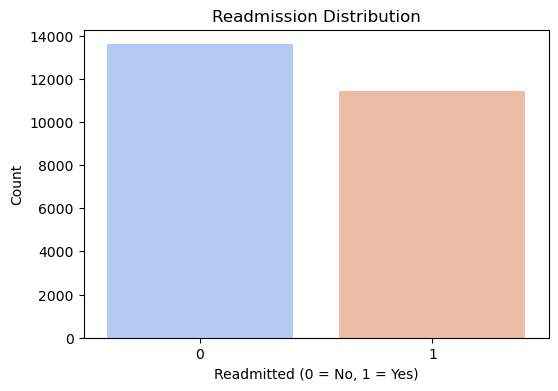

In [41]:
# This is readmission distribution plot
plt.figure(figsize=(6, 4))
sns.countplot(x='readmitted', data=df, palette="coolwarm")
plt.title("Readmission Distribution")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

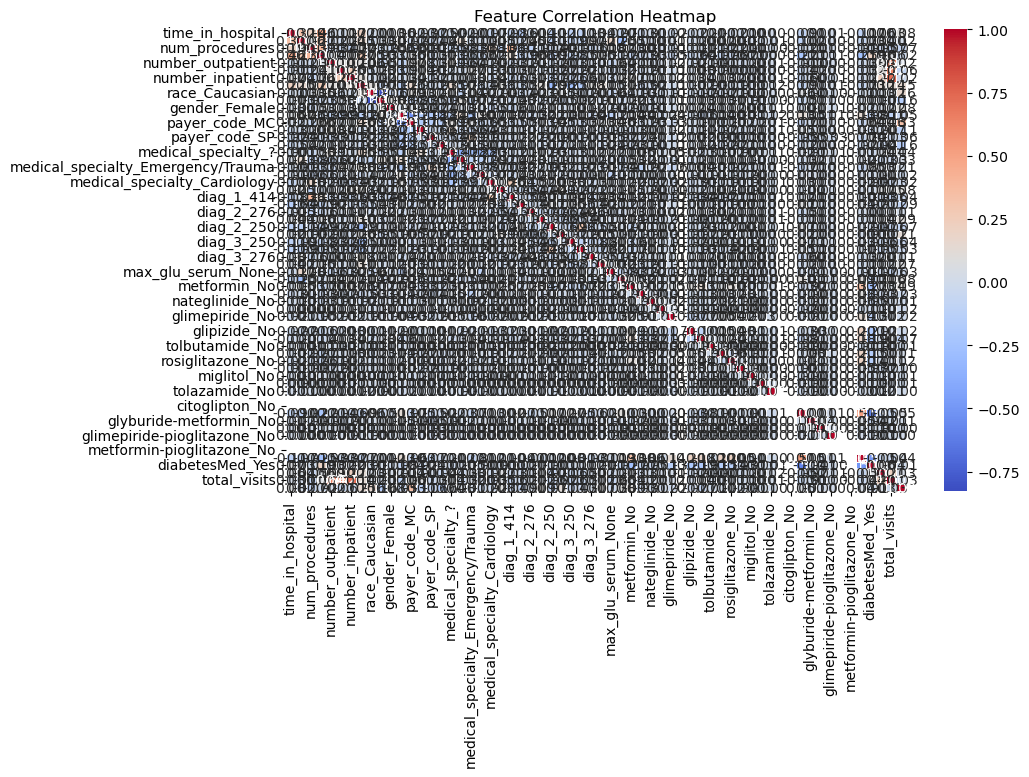

In [43]:
# This is correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [51]:
# This is to save the cleaned dataset
df.to_csv("cleaned_hospital_readmissions.csv", index=False)

In [53]:
print("\n Dataset successfully cleaned and saved as 'cleaned_hospital_readmissions.csv'!")


 Dataset successfully cleaned and saved as 'cleaned_hospital_readmissions.csv'!
